# Kmeans

In [1]:
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

## Medir el desempeño

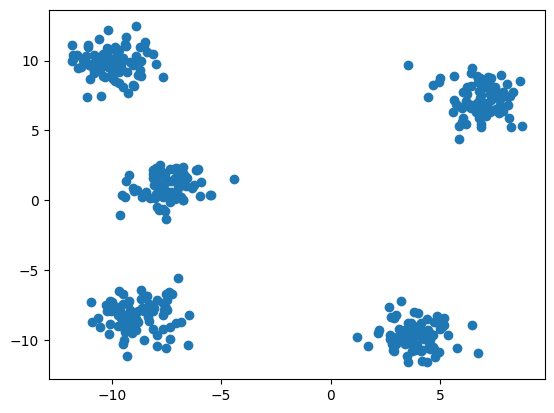

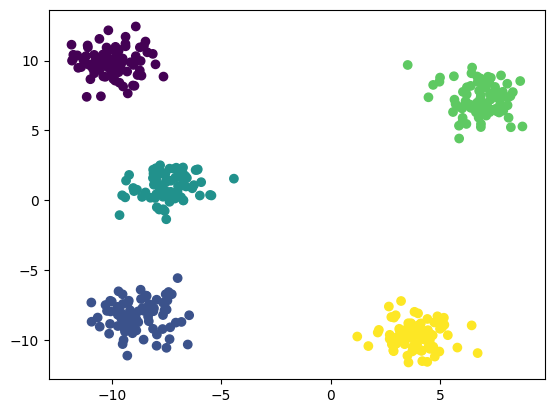

In [2]:
X, y = make_blobs(400, 2, centers=5)
plt.scatter(X[:, 0], X[:, 1])
plt.show()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

# Suma de cuadrados

La suma de los cuadrados de las distancias se guarda en el atributo "inertia_"

In [6]:
K = [2, 3, 4, 5, 200]
for k in K:
  km = KMeans(n_clusters=k, n_init='auto')
  km.fit(X)
  print(f"k: {k} SSE:{km.inertia_}")

k: 2 SSE:23772.808329603013
k: 3 SSE:10705.381007354837
k: 4 SSE:4298.422177751431
k: 5 SSE:790.5144552743409
k: 200 SSE:6.035464510816574


Graficar el error puede darnos una idea del número correcto de clusters

# Técnica del codo

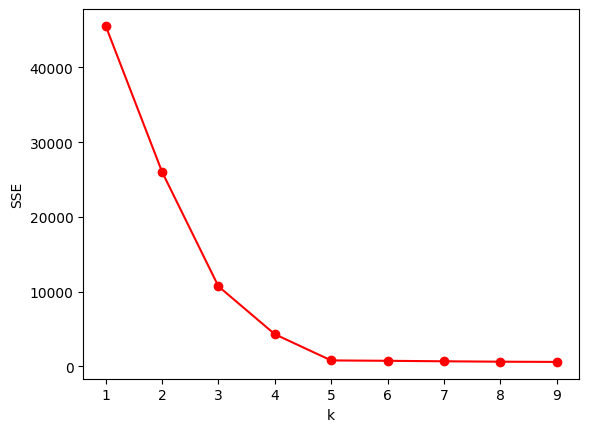

In [8]:
sse = []
k_range = list(range(1, 10))

for k in k_range:
    km = KMeans(n_clusters=k, n_init='auto')
    km.fit(X)
    sse.append(km.inertia_)

plt.plot(k_range, sse, '-or')
plt.xlabel("k")
plt.ylabel('SSE');

La técnica del codo nos puede ayudar a elegir el mejor número de clusters. Se recomienda elegir el número que corresponde a la parte curva de la gráfica, donde estaría el "codo".

# Silueta

In [10]:
from sklearn.metrics import silhouette_score

In [11]:
K = [2,3,4,5]
for k in K:
  km = KMeans(k, n_init='auto')
  y_km = km.fit_predict(X)
  score = silhouette_score(X, y_km, metric='euclidean')
  print(f"k: {k} Silueta:{score}")

k: 2 Silueta:0.483877259275569
k: 3 Silueta:0.63109217180627
k: 4 Silueta:0.7338535461080684
k: 5 Silueta:0.831737462563566


Graficar varios para saber el mejor valor de k

Text(0, 0.5, 'Silueta')

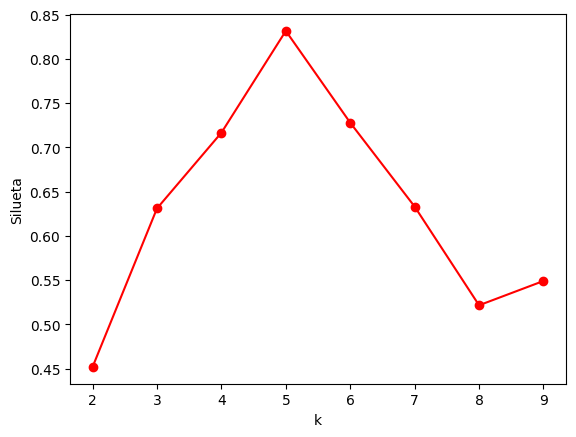

In [12]:
sil = []
k_range = list(range(2, 10))

for k in k_range:
    km = KMeans(n_clusters=k, n_init='auto')
    y_km = km.fit_predict(X)
    score = silhouette_score(X, y_km, metric='euclidean')
    sil.append(score)

plt.plot(k_range, sil, '-or')
plt.xlabel("k")
plt.ylabel('Silueta')

Mientras más alto, la separación el clusters se considera mejor.